## Creating first machine learing model -  Predicting Car Prices

In this guided project, we'll practice the machine learning workflow, using the k-nearest neighbors algorithm. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.
We'll build model which will predcit car prices. 

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

#dataset doesn't contains column names, so we added them manually
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)

In [2]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                          'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
                          'highway-mpg', 'price']

cars = cars[continuous_values_cols]

## Data Cleaning

The first step is determine if we have any missing values. Building our model, we can't have any `NaN` values which we could use. First look at dataset above, we saw that we have some `?` values in `normalized-losses` column. We have to replace them. We will also **rescale** the values in the numeric columns.

In [4]:
cars = cars.replace('?', np.nan)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [6]:
cars = cars.astype(float)

In [7]:
cars.isnull().sum()


normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Let's remove some `NaN` values from `price` column. There are only 4 there and we want predict price, so we need all values here.

In [8]:
cars = cars[cars['price'].notnull()].copy()

We saw above, that we have some missing values in `bore`, `stroke`, `horsepower` and `peak-rpm` columns. The best way will be to count the average for each column and replace with missing values. Our dataset is not large, so we try to keep as many rows as is possible.

In [9]:
cars = cars.fillna(cars.mean())

In [10]:
cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
#rescale all columns except price column
price = cars['price']

cars = (cars - cars.min()) / (cars.max() - cars.min())


cars['price'] = price

In [12]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure code workflow and understand the features better.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(traning_column, target_column, df):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    index_half = round(len(cars) / 2)
    first_half = shuffled_df.iloc[:index_half]
    second_half = shuffled_df.iloc[index_half:]  
    
    
    knn.fit(first_half[traning_column], first_half[target_column])
    predictions = knn.predict(second_half[traning_column])
    
    mse = mean_squared_error(second_half[target_column], predictions) 
    rmse = mse**(1/2)
    return rmse

In [14]:
rmse_cols = {}
cols_all = cars.columns.drop('price')

for col in cols_all:
    result = knn_train_test([col], 'price', cars)
    rmse_cols[col] = result
    
rmse_cols = pd.Series(rmse_cols)
rmse_cols.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [15]:
def knn_train_test(traning_column, target_column, df, k_value):
    
    knn = KNeighborsRegressor(n_neighbors=k_value)
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    index_half = round(len(cars) / 2)
    first_half = shuffled_df.iloc[:index_half]
    second_half = shuffled_df.iloc[index_half:]  
    
    
    knn.fit(first_half[traning_column], first_half[target_column])
    predictions = knn.predict(second_half[traning_column])
    
    mse = mean_squared_error(second_half[target_column], predictions) 
    rmse = mse**(1/2)
    return rmse

k_values = [1, 3, 5, 7, 9]
rmse ={}

for col in cols_all:
    rmse[col] = 0
    rmse_each = {}
    for k in k_values:
        result = knn_train_test([col], 'price', cars, k)
        rmse_each[k] = result
    rmse[col] = rmse_each
        

In [16]:
rmse

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

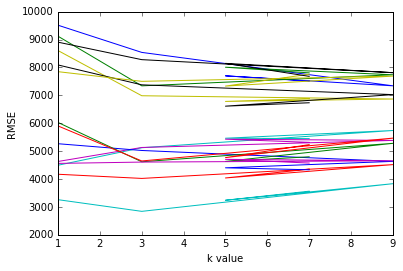

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')    

## Multivariate Model

Let's add some features to our model. As we saw above using only 1 column makes prediction not accurate. We'll set now default `k` value and check:

* best 2 features,
* best 3 features,
* best 4 features,
* best 5 features.

In [18]:
rmse_cols.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [19]:
rmse_features = {}

rmse_features['2 best'] = knn_train_test(['engine-size', 'horsepower'], 'price', cars, 5)
rmse_features['3 best'] = knn_train_test(['engine-size', 'horsepower', 'curb-weight'], 'price', cars, 5)
rmse_features['4 best'] = knn_train_test(['engine-size', 'horsepower', 'curb-weight', 'highway-mpg'], 'price', cars, 5)
rmse_features['5 best'] = knn_train_test(['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width'], 'price', cars, 5)

rmse_features

{'2 best': 2949.8817277180374,
 '3 best': 3435.2601095401815,
 '4 best': 3286.5597353252815,
 '5 best': 3410.2170133901805}

## Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.

In [20]:
def knn_train_test(traning_column, target_column, df):
    
    
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    index_half = round(len(cars) / 2)
    first_half = shuffled_df.iloc[:index_half]
    second_half = shuffled_df.iloc[index_half:]  
    
    k_values = [x for x in range(1,26)]
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(first_half[traning_column], first_half[target_column])
        predictions = knn.predict(second_half[traning_column])
    
        mse = mean_squared_error(second_half[target_column], predictions) 
        rmse = mse**(1/2)
        k_rmse[k] = rmse
        
    return k_rmse

rmse_k = {}
rmse_k['2 best'] = knn_train_test(['engine-size', 'horsepower'], 'price', cars)
rmse_k['5 best'] = knn_train_test(['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width'], 'price', cars)
rmse_k['4 best'] = knn_train_test(['engine-size', 'horsepower', 'curb-weight', 'highway-mpg'], 'price', cars)

In [21]:
rmse_k

{'2 best': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '4 best': {1: 2927.820116343107,
  2: 2600.431466008274,
  3: 2799.0983199667144,
  4: 3074.9999988931822,
  5: 3286.5597353252815,
  6: 3705.1702717384333,
  7: 3822.180444798032,
  8: 3986.7014080509525,
  9: 4210.340136384571,
  10: 4213.315457869819,
  11: 4182.323353796191,
  12: 4288.696189501458,
  13: 4249.894628724804,
  14: 4357.287937912011,
  15: 4451

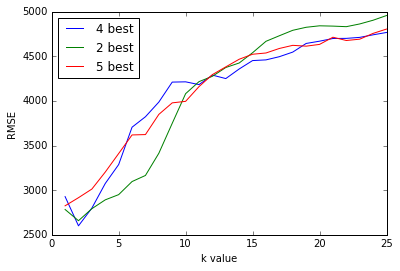

In [22]:
for k,v in rmse_k.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc="upper left")
plt.show()

## Cross validation

We will also check another technique - cross validation instead of test/train validation. Previous we split dataset on half. Now we will split our dataset on 5 parts. 

In [23]:
cars.loc[cars.index[0:40], "fold"] = 1
cars.loc[cars.index[40:80], "fold"] = 2
cars.loc[cars.index[80:120], "fold"] = 3
cars.loc[cars.index[120:160], "fold"] = 4
cars.loc[cars.index[160:], "fold"] = 5

cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price,fold
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0,1.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0,1.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0,1.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0,1.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0,1.0


In [24]:
fold_ids = [1,2,3,4,5]

def knn_train_test_cross(df, folds):
    
    rmses_list = []
    for fold in folds:
        knn = KNeighborsRegressor()
        train = df[df['fold'] != fold].copy()
        test = df[df['fold'] == fold].copy()
        knn.fit(train[['engine-size', 'horsepower']], train['price'])
        predict = knn.predict(test[['engine-size', 'horsepower']])
        rmse = mean_squared_error(test['price'], predict)**(1/2)
        rmses_list.append(rmse)
    return rmses_list

rmse = knn_train_test_cross(cars, fold_ids)

rmse

[3996.4477845957153,
 4357.911313806191,
 3388.27634793858,
 2689.208208562513,
 3798.278277350821]

## Conclusions

We build machine learing model using the k-nearest neighbors algorithm to predcit car prices. We noticed that:

* `k` value = 2 is the best value to set in model with 2 best and 4 best features
* using only one feature the best is `engine-size` column with rmse = 3238
* the lowest rmse value (2600) was result of using 4 features: `'engine-size', 'horsepower', 'curb-weight', 'highway-mpg'` and k = 2
* test/train validation method gave us better resultat in lower rmse than using cross validation, however the difference is not large

However, our model predict prices with large approximation. One of the reson could be a very small dataset.